# Portifólio 
Eduardo do Amaral Melo Pereira

In [173]:
# Importando bibliotecas
import os
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas_datareader.data as web
from pandas_datareader import data, wb
from mpl_toolkits.mplot3d import Axes3D

#### Arquivos CSV

In [41]:
# Equinor (A Equinor é uma empresa internacional de energia que atua em petróleo, gás, energias renováveis e soluções de baixo carbono)
EQNR = pd.read_csv("EQNR.csv",index_col = 'Date',parse_dates=True)['Adj Close'] 

# Petrobras (Petrobrás é uma empresa brasileira de economia mista que atua na exploração, produção, refino, transporte e comercialização de petróleo, gás natural e derivados)
PBR = pd.read_csv("PBR.csv",index_col = 'Date',parse_dates=True)['Adj Close']

# Shell (Shell é uma empresa multinacional petrolífera britânica)
SHELL =pd.read_csv("SHELL.csv",index_col = 'Date',parse_dates=True)['Adj Close'] 

# TotalEnergies (TotalEnergies é uma empresa global de energia que produz e comercializa diversos tipos de energia, como petróleo, gás natural, biocombustíveis, energias renováveis, eletricidade e gases verdes)
TTE = pd.read_csv("TTE.csv",index_col = 'Date',parse_dates=True)['Adj Close'] 

<Axes: xlabel='Date'>

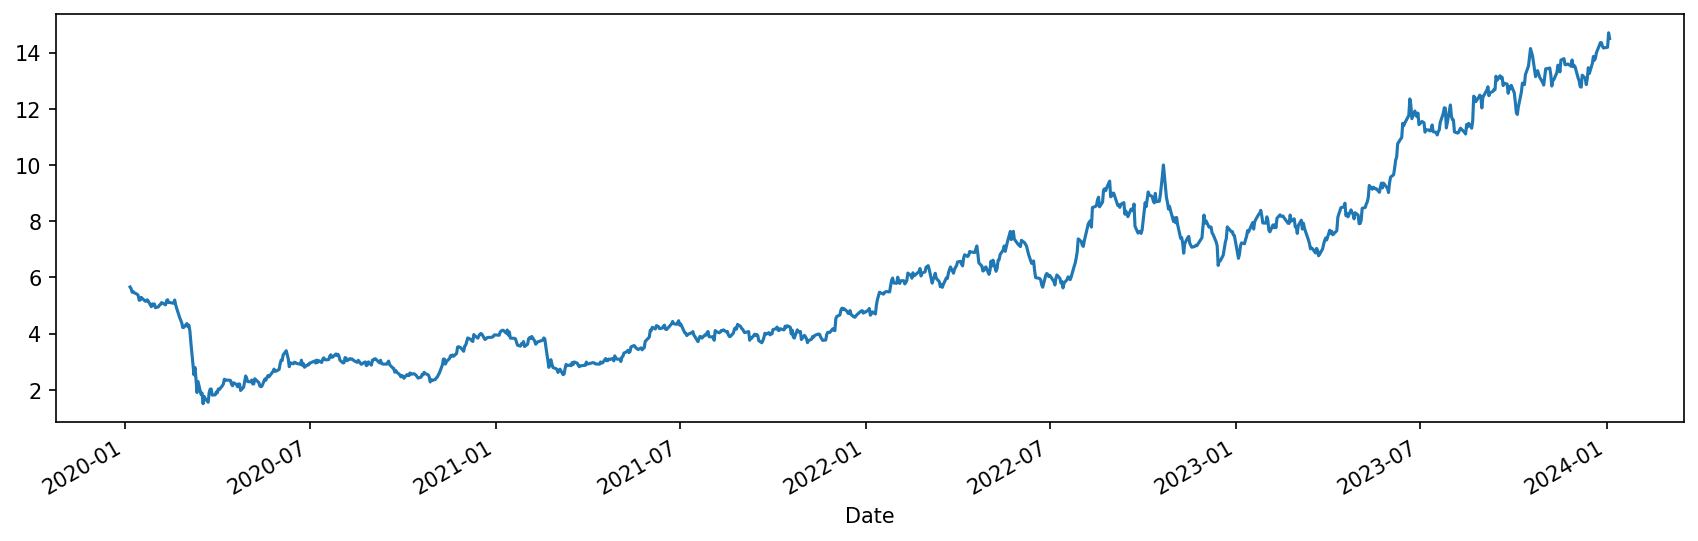

In [42]:
plt.figure(dpi=150)
PETR.plot(figsize=(14,4))

#### Combinando todos os 4 DataFrames

In [45]:
oilandmineral = pd.concat([EQNR,PETR,SHELL,TTE],axis=1)
oilandmineral.columns = ['EQNR','PBR','SHELL','TTE']

In [46]:
oilandmineral

,EQNR,PBR,SHELL,TTE
Date,,,,
2020-01-06,14.728870,5.657923,50.177425,41.605736
2020-01-07,14.560220,5.602111,49.716488,41.370136
2020-01-08,14.447784,5.476536,49.132065,41.119804
2020-01-09,14.525083,5.493976,49.123825,41.141895
2020-01-10,14.363458,5.455605,48.572342,40.832676
...,...,...,...,...
2023-12-28,28.124424,14.217845,62.865051,64.446907
2023-12-29,28.195715,14.164627,63.201237,64.889908
2024-01-02,28.053131,14.191236,63.306889,65.072891


## Retorno diário
Retorno diario de cada empresa

In [47]:
# variação percentual do elemento atual em relação ao elemento anterior
oilandmineral_returns = oilandmineral.pct_change(1).dropna()

In [48]:
oilandmineral_returns

,EQNR,PBR,SHELL,TTE
Date,,,,
2020-01-07,-0.011450,-0.009864,-0.009186,-0.005663
2020-01-08,-0.007722,-0.022416,-0.011755,-0.006051
2020-01-09,0.005350,0.003184,-0.000168,0.000537
2020-01-10,-0.011127,-0.006984,-0.011226,-0.007516
2020-01-13,0.002446,-0.010230,-0.000847,-0.001082
...,...,...,...,...
2023-12-28,-0.020788,-0.009271,-0.010283,-0.020936
2023-12-29,0.002535,-0.003743,0.005348,0.006874
2024-01-02,-0.005057,0.001879,0.001672,0.002820


<Axes: xlabel='Date'>

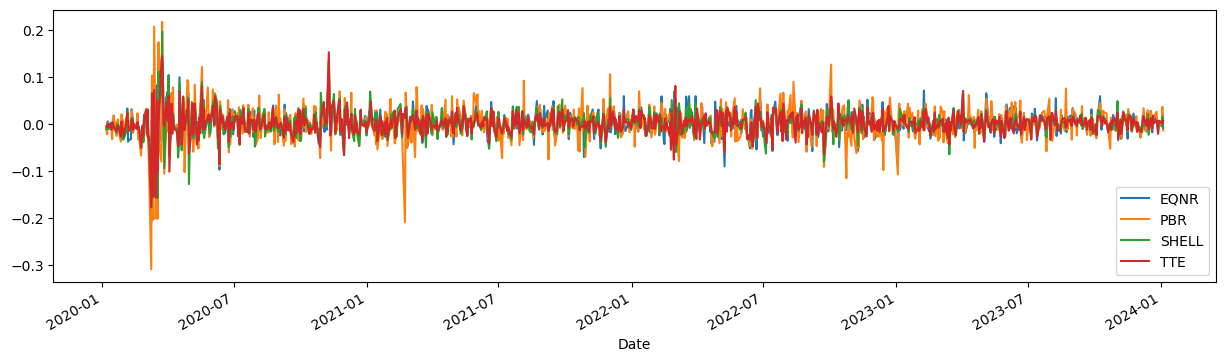

In [50]:
oilandmineral_returns.plot(figsize=(15,4))

<Axes: ylabel='Frequency'>

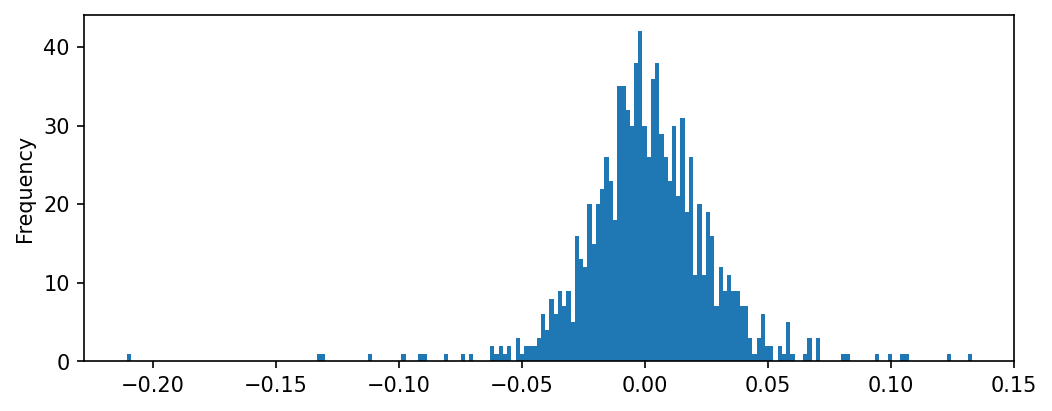

In [56]:
# Historgama da variação percentual individual
plt.figure(dpi=150)
oilandmineral_returns['EQNR'].plot(kind='hist',bins=200,figsize=(8,3))

<Axes: ylabel='Frequency'>

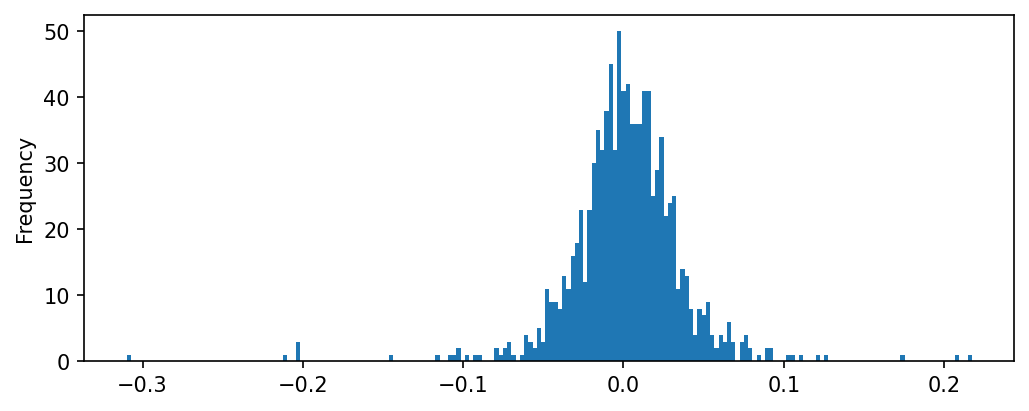

In [57]:
# Historgama da variação percentual individual
plt.figure(dpi=150)
oilandmineral_returns['PBR'].plot(kind='hist',bins=200,figsize=(8,3))

<Axes: ylabel='Frequency'>

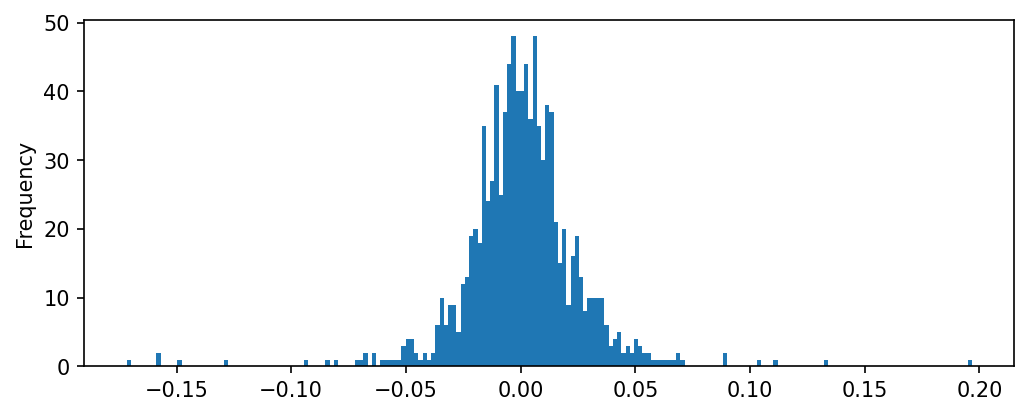

In [58]:
# Historgama da variação percentual individual
plt.figure(dpi=150)
oilandmineral_returns['SHELL'].plot(kind='hist',bins=200,figsize=(8,3))

<Axes: ylabel='Frequency'>

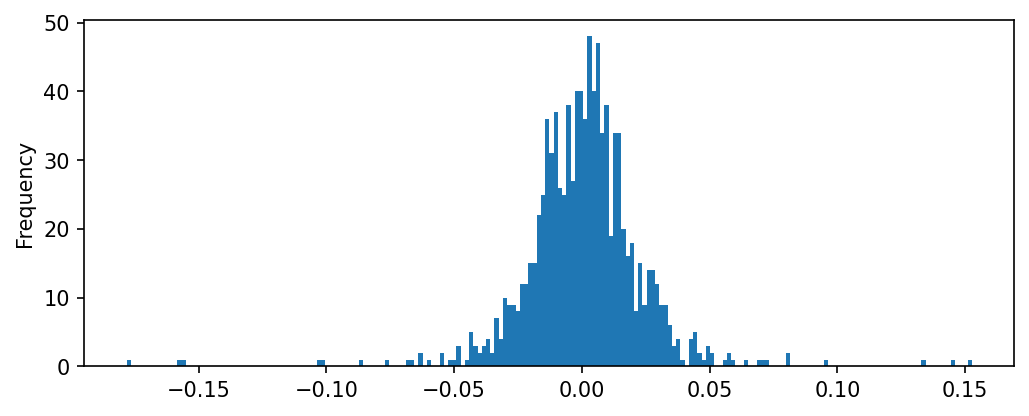

In [59]:
# Historgama da variação percentual individual
plt.figure(dpi=150)
oilandmineral_returns['TTE'].plot(kind='hist',bins=200,figsize=(8,3))

## Retorno Cumulativo
O retorno cumulativo é o lucro ou rentabilidade de uma ação ao longo de todo o período de investimento.

O retorno financeiro mede uma variação percentual no valor de um investimento de um período para outro.

##### Retorno do Equinor


In [94]:
(1 + oilandmineral_returns['EQNR']).cumprod() - 1 

Date
2020-01-07   -0.011450
2020-01-08   -0.019084
2020-01-09   -0.013836
2020-01-10   -0.024809
2020-01-13   -0.022424
                ...   
2023-12-28    0.909476
2023-12-29    0.914316
2024-01-02    0.904636
2024-01-03    0.943963
2024-01-04    0.943963
Name: EQNR, Length: 1006, dtype: float64

In [95]:
# Retorno Cumulativo em porcentagem
cumul_return_perc_EQNR = ((1 + oilandmineral_returns['EQNR']).cumprod() - 1 )*100

Text(0, 0.5, 'Retorno Cumulativo as %')

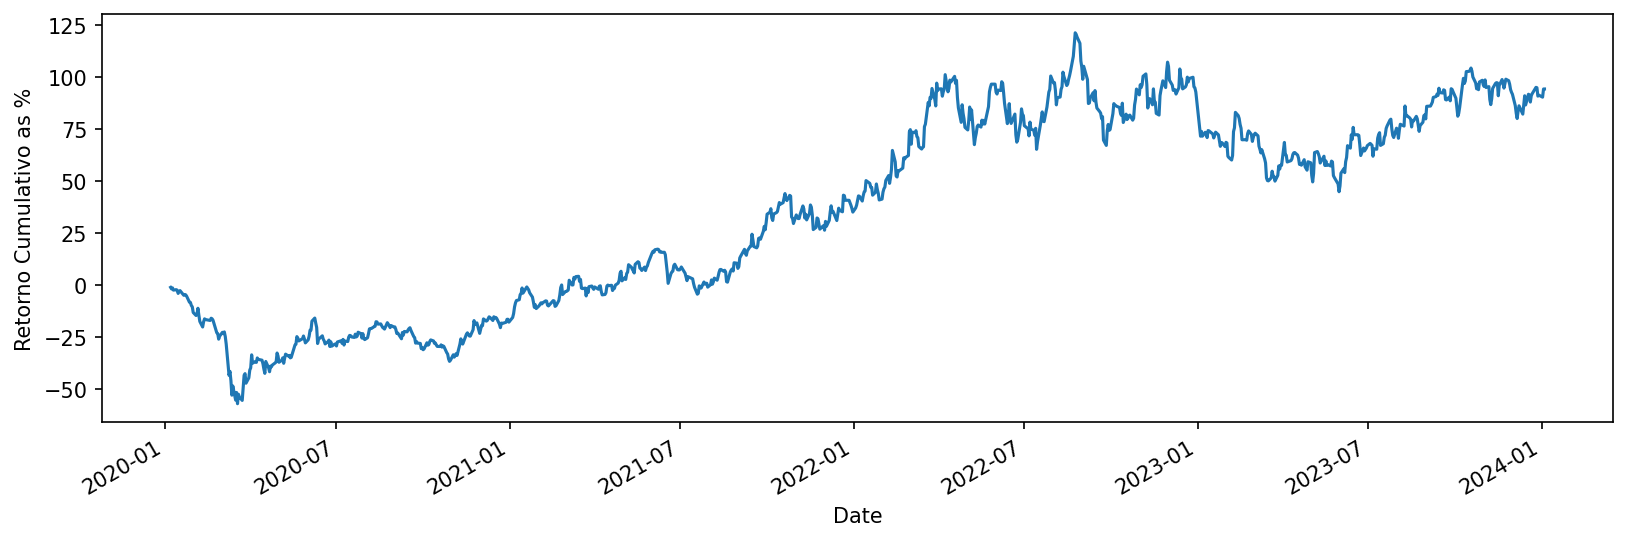

In [96]:
plt.figure(dpi=150)
cumul_return_perc_EQNR.plot(figsize=(13,4))
plt.ylabel("Retorno Cumulativo as %")

##### Retorno do Petrobras


In [97]:
(1 + oilandmineral_returns['PBR']).cumprod() - 1 

Date
2020-01-07   -0.009864
2020-01-08   -0.032059
2020-01-09   -0.028977
2020-01-10   -0.035758
2020-01-13   -0.045623
                ...   
2023-12-28    1.512909
2023-12-29    1.503503
2024-01-02    1.508206
2024-01-03    1.599129
2024-01-04    1.563073
Name: PBR, Length: 1006, dtype: float64

In [98]:
# Retorno Cumulativo em porcentagem
cumul_return_perc_PBR = ((1 + oilandmineral_returns['PBR']).cumprod() - 1 )*100

Text(0, 0.5, 'Retorno Cumulativo as %')

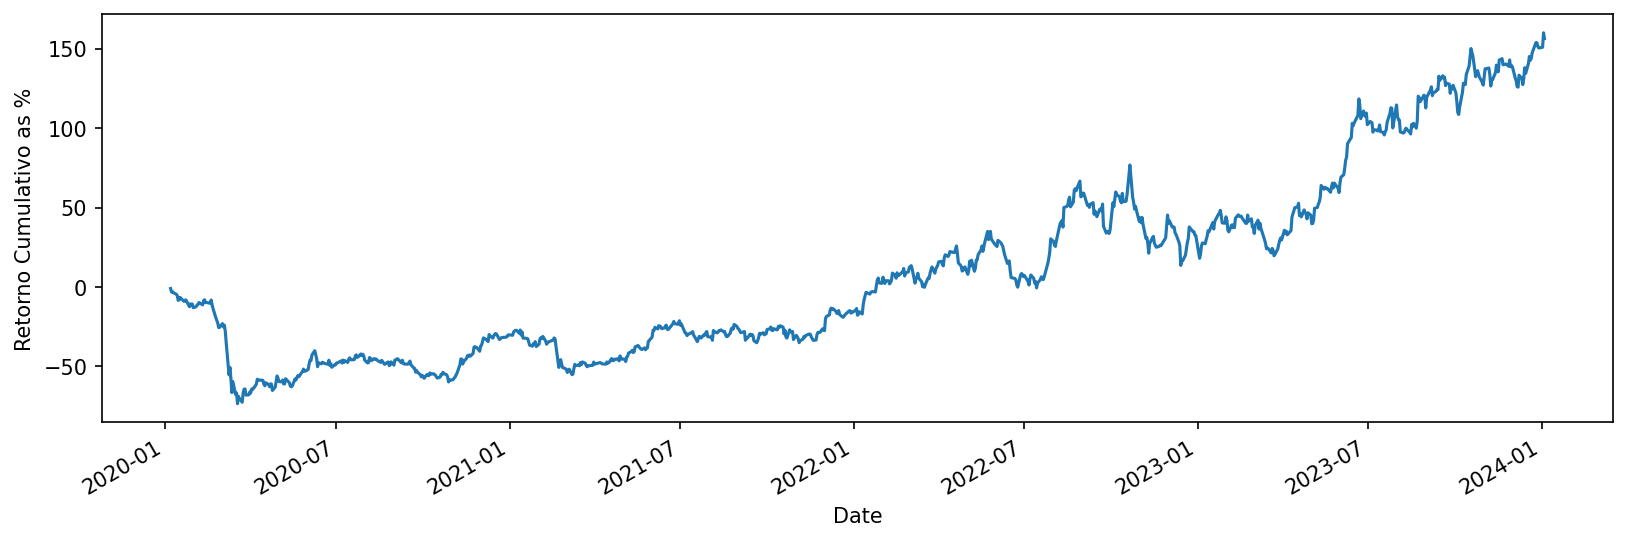

In [99]:
plt.figure(dpi=150)
cumul_return_perc_PBR.plot(figsize=(13,4))
plt.ylabel("Retorno Cumulativo as %")

##### Retorno da Shell


In [100]:
(1 + oilandmineral_returns['SHELL']).cumprod() - 1 

Date
2020-01-07   -0.009186
2020-01-08   -0.020833
2020-01-09   -0.020997
2020-01-10   -0.031988
2020-01-13   -0.032808
                ...   
2023-12-28    0.252855
2023-12-29    0.259555
2024-01-02    0.261661
2024-01-03    0.281186
2024-01-04    0.270275
Name: SHELL, Length: 1006, dtype: float64

In [101]:
# Retorno Cumulativo em porcentagem
cumul_return_perc_SHELL = ((1 + oilandmineral_returns['SHELL']).cumprod() - 1 )*100

Text(0, 0.5, 'Retorno Cumulativo as %')

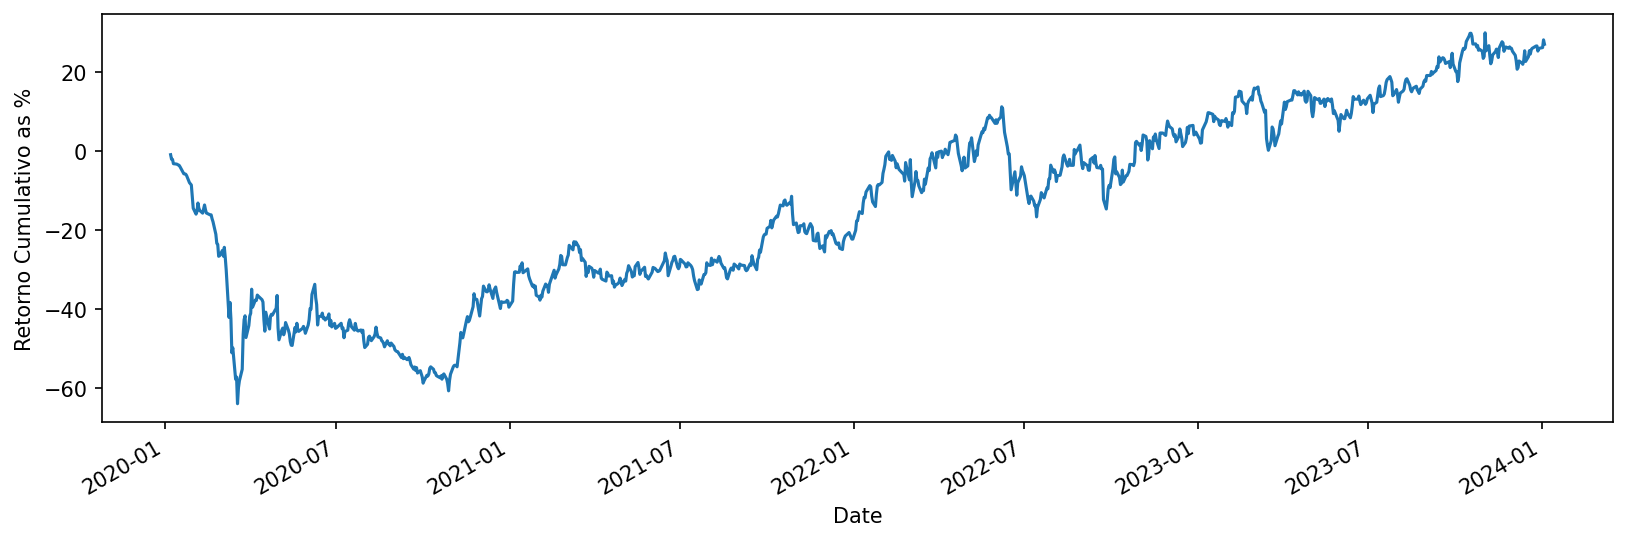

In [102]:
plt.figure(dpi=150)
cumul_return_perc_SHELL.plot(figsize=(13,4))
plt.ylabel("Retorno Cumulativo as %")

##### Retorno da TotalEnergies


In [103]:
(1 + oilandmineral_returns['TTE']).cumprod() - 1 

Date
2020-01-07   -0.005663
2020-01-08   -0.011679
2020-01-09   -0.011148
2020-01-10   -0.018581
2020-01-13   -0.019642
                ...   
2023-12-28    0.548991
2023-12-29    0.559639
2024-01-02    0.564037
2024-01-03    0.564962
2024-01-04    0.575147
Name: TTE, Length: 1006, dtype: float64

In [104]:
# Retorno Cumulativo em porcentagem
cumul_return_perc_TTE = ((1 + oilandmineral_returns['TTE']).cumprod() - 1 )*100

Text(0, 0.5, 'Retorno Cumulativo as %')

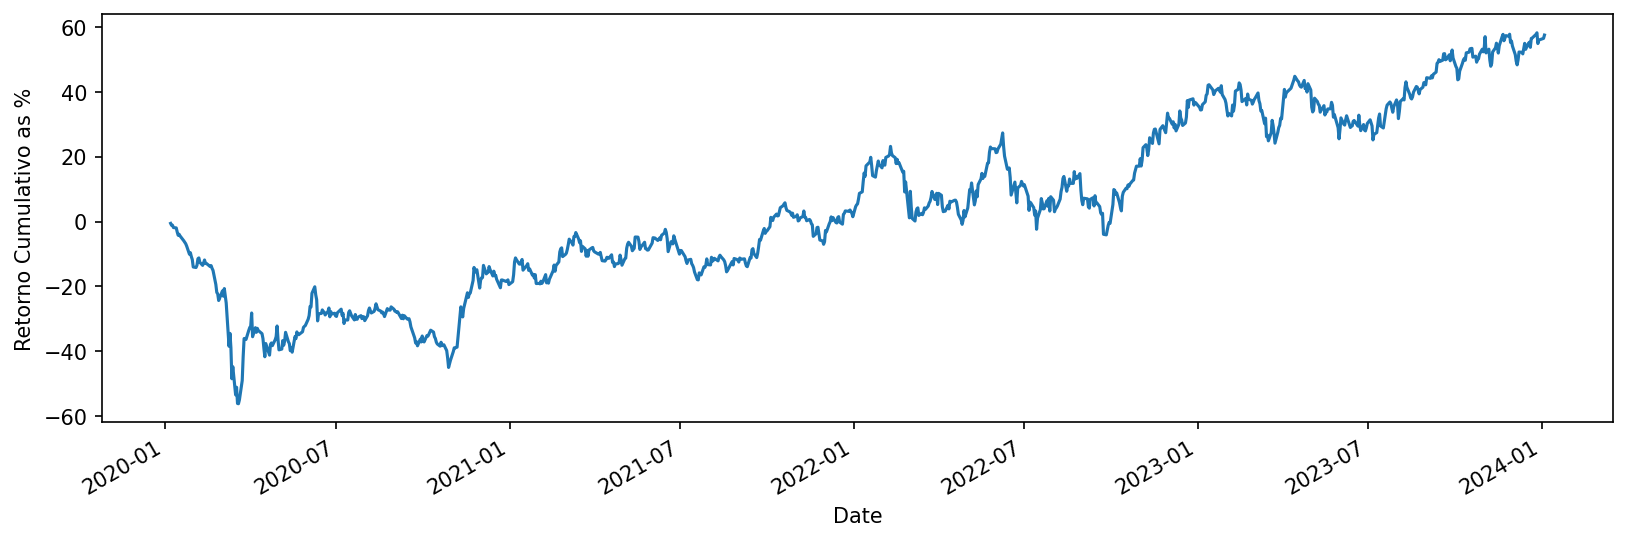

In [105]:
plt.figure(dpi=150)
cumul_return_perc_TTE.plot(figsize=(13,4))
plt.ylabel("Retorno Cumulativo as %")

## Retorno Ponderado
É uma medida que avalia o desempenho de um portfólio de investimentos, independentemente de fluxos de caixa.

É recomendado calcular os retornos com base em uma ponderação usando o produto escalar.

In [107]:
 # Exemplo
example_returns = np.array([1,0.5]) # 100% and 50% returns

In [108]:
weights = [1,0]
np.dot(weights,example_returns)

1.0

In [110]:
# Aplicando isso ao nosso dataframe de retornos

In [112]:
oilandmineral_returns

,EQNR,PBR,SHELL,TTE
Date,,,,
2020-01-07,-0.011450,-0.009864,-0.009186,-0.005663
2020-01-08,-0.007722,-0.022416,-0.011755,-0.006051
2020-01-09,0.005350,0.003184,-0.000168,0.000537
2020-01-10,-0.011127,-0.006984,-0.011226,-0.007516
2020-01-13,0.002446,-0.010230,-0.000847,-0.001082
...,...,...,...,...
2023-12-28,-0.020788,-0.009271,-0.010283,-0.020936
2023-12-29,0.002535,-0.003743,0.005348,0.006874
2024-01-02,-0.005057,0.001879,0.001672,0.002820


In [114]:
np.dot([1,0,0,0],oilandmineral_returns.transpose())

array([-0.01145034, -0.00772209,  0.00535017, ..., -0.00505693,
        0.02064813,  0.        ])

##### Retornos cumulativos iguas 

In [117]:
# Calcular pesos iguais para cada coluna do DataFrame
N = len(oilandmineral_returns.columns)
equal_weights = N * [1/N] 

In [118]:
equal_weights

[0.25, 0.25, 0.25, 0.25]

In [120]:
equal_returns = np.dot(equal_weights,oilandmineral_returns.transpose())

In [121]:
equal_returns

array([-0.00904086, -0.011986  ,  0.00222604, ...,  0.00032829,
        0.01824142, -0.00397013])

In [124]:
cum_equal_returns =   (1 + equal_returns).cumprod() - 1

In [125]:
cum_equal_returns

array([-0.00904086, -0.0209185 , -0.01873902, ...,  0.93545692,
        0.97076241,  0.96293824])

In [127]:
cum_equal_returns_perc = pd.Series(100 * cum_equal_returns)
cum_equal_returns_perc.index = oilandmineral_returns.index

<Axes: xlabel='Date'>

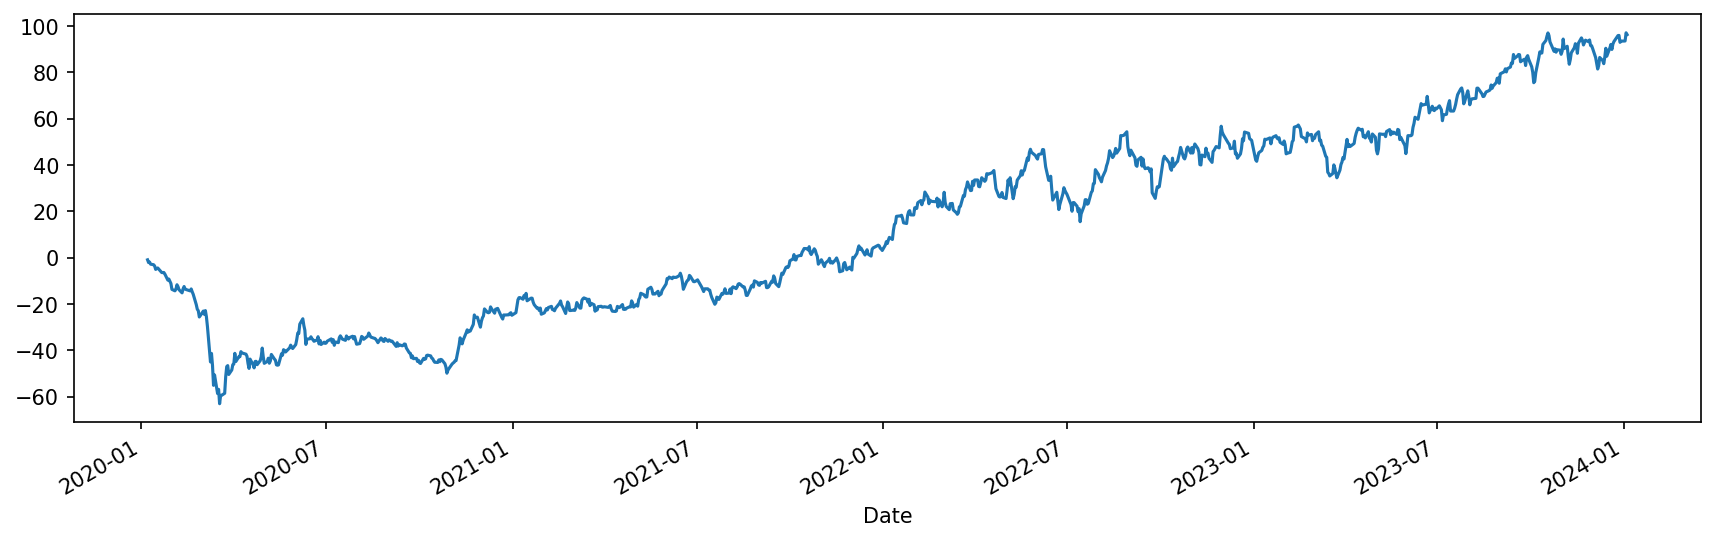

In [132]:
plt.figure(dpi=150)
cum_equal_returns_perc.plot(figsize=(14,4))

##### Comparação entre o retorno acumulativo total e o retorno cumulativo individual

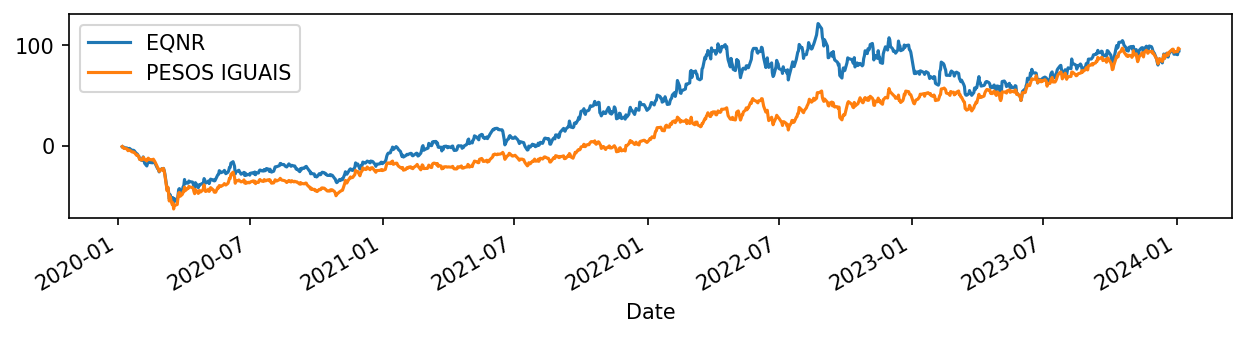

In [133]:
# Comparação com o EGNR
plt.figure(dpi=150)
cumul_return_perc_EQNR.plot(figsize=(10,2),label='EQNR')
cum_equal_returns_perc.plot(figsize=(10,2),label='PESOS IGUAIS')
plt.legend()

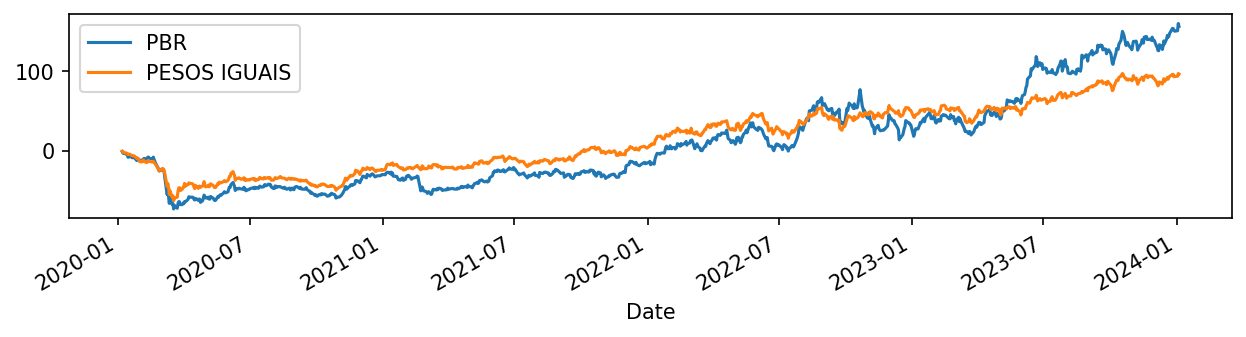

In [134]:
# Comparação com o PBR
plt.figure(dpi=150)
cumul_return_perc_PBR.plot(figsize=(10,2),label='PBR')
cum_equal_returns_perc.plot(figsize=(10,2),label='PESOS IGUAIS')
plt.legend()

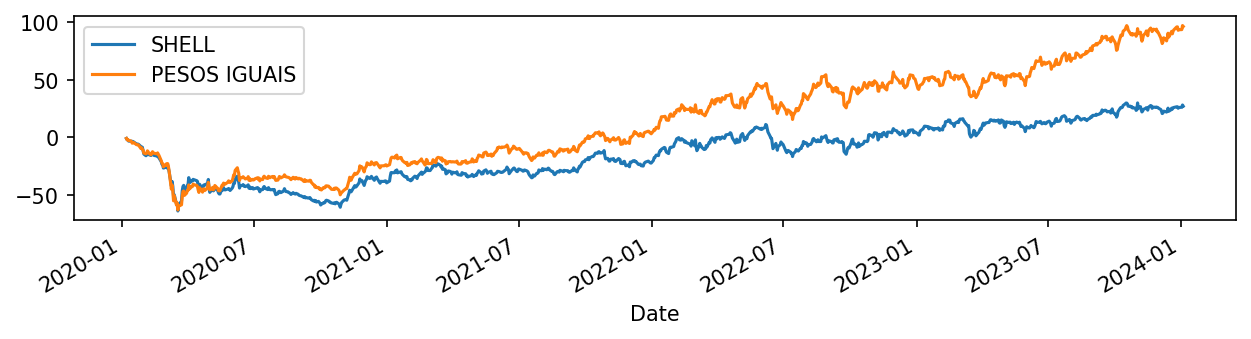

In [135]:
# Comparação com o SHELL
plt.figure(dpi=150)
cumul_return_perc_SHELL.plot(figsize=(10,2),label='SHELL')
cum_equal_returns_perc.plot(figsize=(10,2),label='PESOS IGUAIS')
plt.legend()

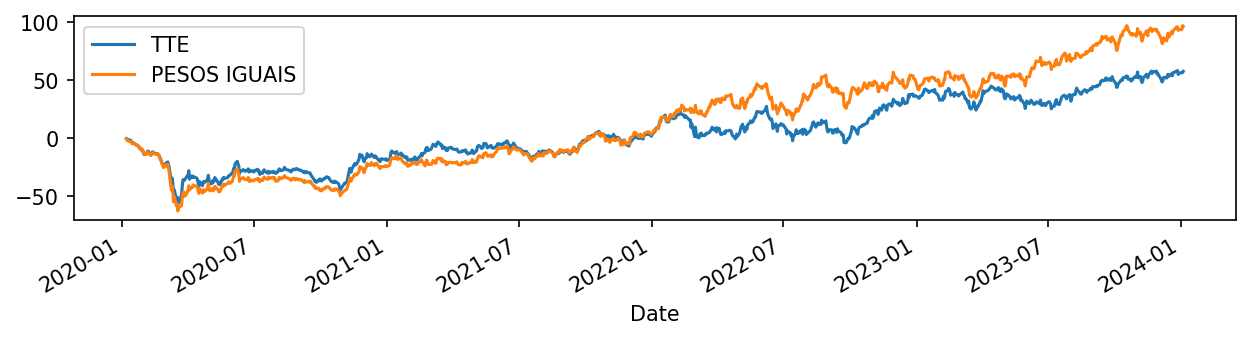

In [136]:
# Comparação com o TTE
plt.figure(dpi=150)
cumul_return_perc_TTE.plot(figsize=(10,2),label='TTE')
cum_equal_returns_perc.plot(figsize=(10,2),label='PESOS IGUAIS')
plt.legend()

### Mapeando e traçando retornos, riscos e índices de Sharpe (o indicador que avalia o risco e o retorno de um determinado investimento). Dessa forma poderemos escolher visualmente a ponderação desejada.

### Usar retornos em vez de preços tem a vantagem de normalizar os dados

Quando pensamos na melhor forma de ponderar, focamos na média e na variância, o que implica assumir que os retornos seguem uma distribuição normal. Mas como conseguimos isso? Se considerarmos que os preços seguem uma distribuição lognormal (algo que pode ou não ser verdade na prática), então log(1 + r_i) terá uma distribuição normal!

In [143]:
oilandmineral/oilandmineral.shift(1)

,EQNR,PBR,SHELL,TTE
Date,,,,
2020-01-06,NaN,NaN,NaN,NaN
2020-01-07,0.988550,0.990136,0.990814,0.994337
2020-01-08,0.992278,0.977584,0.988245,0.993949
2020-01-09,1.005350,1.003184,0.999832,1.000537
2020-01-10,0.988873,0.993016,0.988774,0.992484
...,...,...,...,...
2023-12-28,0.979212,0.990729,0.989717,0.979064
2023-12-29,1.002535,0.996257,1.005348,1.006874
2024-01-02,0.994943,1.001879,1.001672,1.002820


In [144]:
# Log retorna como porcentagem do dia seguinte
log_rets = np.log(oilandmineral/oilandmineral.shift(1))

In [145]:
log_rets

,EQNR,PBR,SHELL,TTE
Date,,,,
2020-01-06,NaN,NaN,NaN,NaN
2020-01-07,-0.011516,-0.009913,-0.009229,-0.005679
2020-01-08,-0.007752,-0.022671,-0.011825,-0.006069
2020-01-09,0.005336,0.003179,-0.000168,0.000537
2020-01-10,-0.011190,-0.007009,-0.011290,-0.007544
...,...,...,...,...
2023-12-28,-0.021007,-0.009314,-0.010336,-0.021159
2023-12-29,0.002532,-0.003750,0.005333,0.006850
2024-01-02,-0.005070,0.001877,0.001670,0.002816


In [146]:
# Valores mais proximos dos valores originais!
oilandmineral.pct_change(1)

,EQNR,PBR,SHELL,TTE
Date,,,,
2020-01-06,NaN,NaN,NaN,NaN
2020-01-07,-0.011450,-0.009864,-0.009186,-0.005663
2020-01-08,-0.007722,-0.022416,-0.011755,-0.006051
2020-01-09,0.005350,0.003184,-0.000168,0.000537
2020-01-10,-0.011127,-0.006984,-0.011226,-0.007516
...,...,...,...,...
2023-12-28,-0.020788,-0.009271,-0.010283,-0.020936
2023-12-29,0.002535,-0.003743,0.005348,0.006874
2024-01-02,-0.005057,0.001879,0.001672,0.002820


#### Gerando Pesos Aleatórios

Podemos usar o numpy para gerar ponderações aleatórias para testar:

In [147]:
N = len(oilandmineral.columns)

weights = np.random.random(N)

In [148]:
weights

array([0.6579784 , 0.83471516, 0.11173836, 0.75007403])

In [149]:
# Pesos aleatórios onde a soma de seus valores é igual a 1
weights = weights/ np.sum(weights)

In [150]:
weights

array([0.27945497, 0.35451818, 0.04745724, 0.3185696 ])

In [151]:
def gen_weights(N):
    weights = np.random.random(N)
    return weights/ np.sum(weights)

Vamos utilizar duas fuções, uma que forneça os retornos para uma ponderação específica e outra que relate a volatilidade para uma ponderação específica.

#### Função de retorno de portfólio

In [152]:
# Retornos atualizados
# Devemos multiplicar por 252 (número médio de dias úteis em um ano no mercado financeiro)
def calculate_returns(weights,log_rets):
    return np.sum(log_rets.mean()*weights) * 252 

#### Função de volatilidade (variância) do portfólio

Agora calculando a variância de um portfólio inteiro, e não apenas o desvio padrão ou a variância de uma única ação. 

In [153]:
log_rets.cov()

,EQNR,PBR,SHELL,TTE
EQNR,0.000704,0.000637,0.000537,0.000472
PBR,0.000637,0.001352,0.000614,0.000546
SHELL,0.000537,0.000614,0.000667,0.000534
TTE,0.000472,0.000546,0.000534,0.000565


In [154]:
# Matriz de covariância dos retornos logarítmicos
log_rets_cov = log_rets.cov()

In [160]:
# Calculo da volatilidade anualizada de um portfólio baseado em pesos alocados
def calculate_volatility(weights,log_rets_cov):
    annualized_cov = np.dot(log_rets_cov*252,weights)
    vol = np.dot(weights.transpose(),annualized_cov)
    return np.sqrt(vol)

In [161]:
calculate_volatility(weights,log_rets_cov)

0.4184845143582486

Representando as ponderções no retorno esperado versus a volatilidade esperada, colorindo-as pelo índice de Sharpe (indice de Sharpe é um indicador que avalia o risco e o retorno de um determinado investimento):

In [162]:
log_rets = np.log(oilandmineral/oilandmineral.shift(1))
log_rets_cov = log_rets.cov()

In [168]:
# 'MC' refere-se à simulação baseada em números aleatórios para modelar portfólios financeiros
mc_portfolio_returns = []
mc_portfolio_vol = []
mc_weights = []
for sim in range(6000):
    # This may take awhile!
    weights = gen_weights(N=4)
    mc_weights.append(weights)
    mc_portfolio_returns.append(calculate_returns(weights,log_rets))
    mc_portfolio_vol.append(calculate_volatility(weights,log_rets_cov))

In [169]:
mc_sharpe_ratios = np.array(mc_portfolio_returns)/np.array(mc_portfolio_vol)

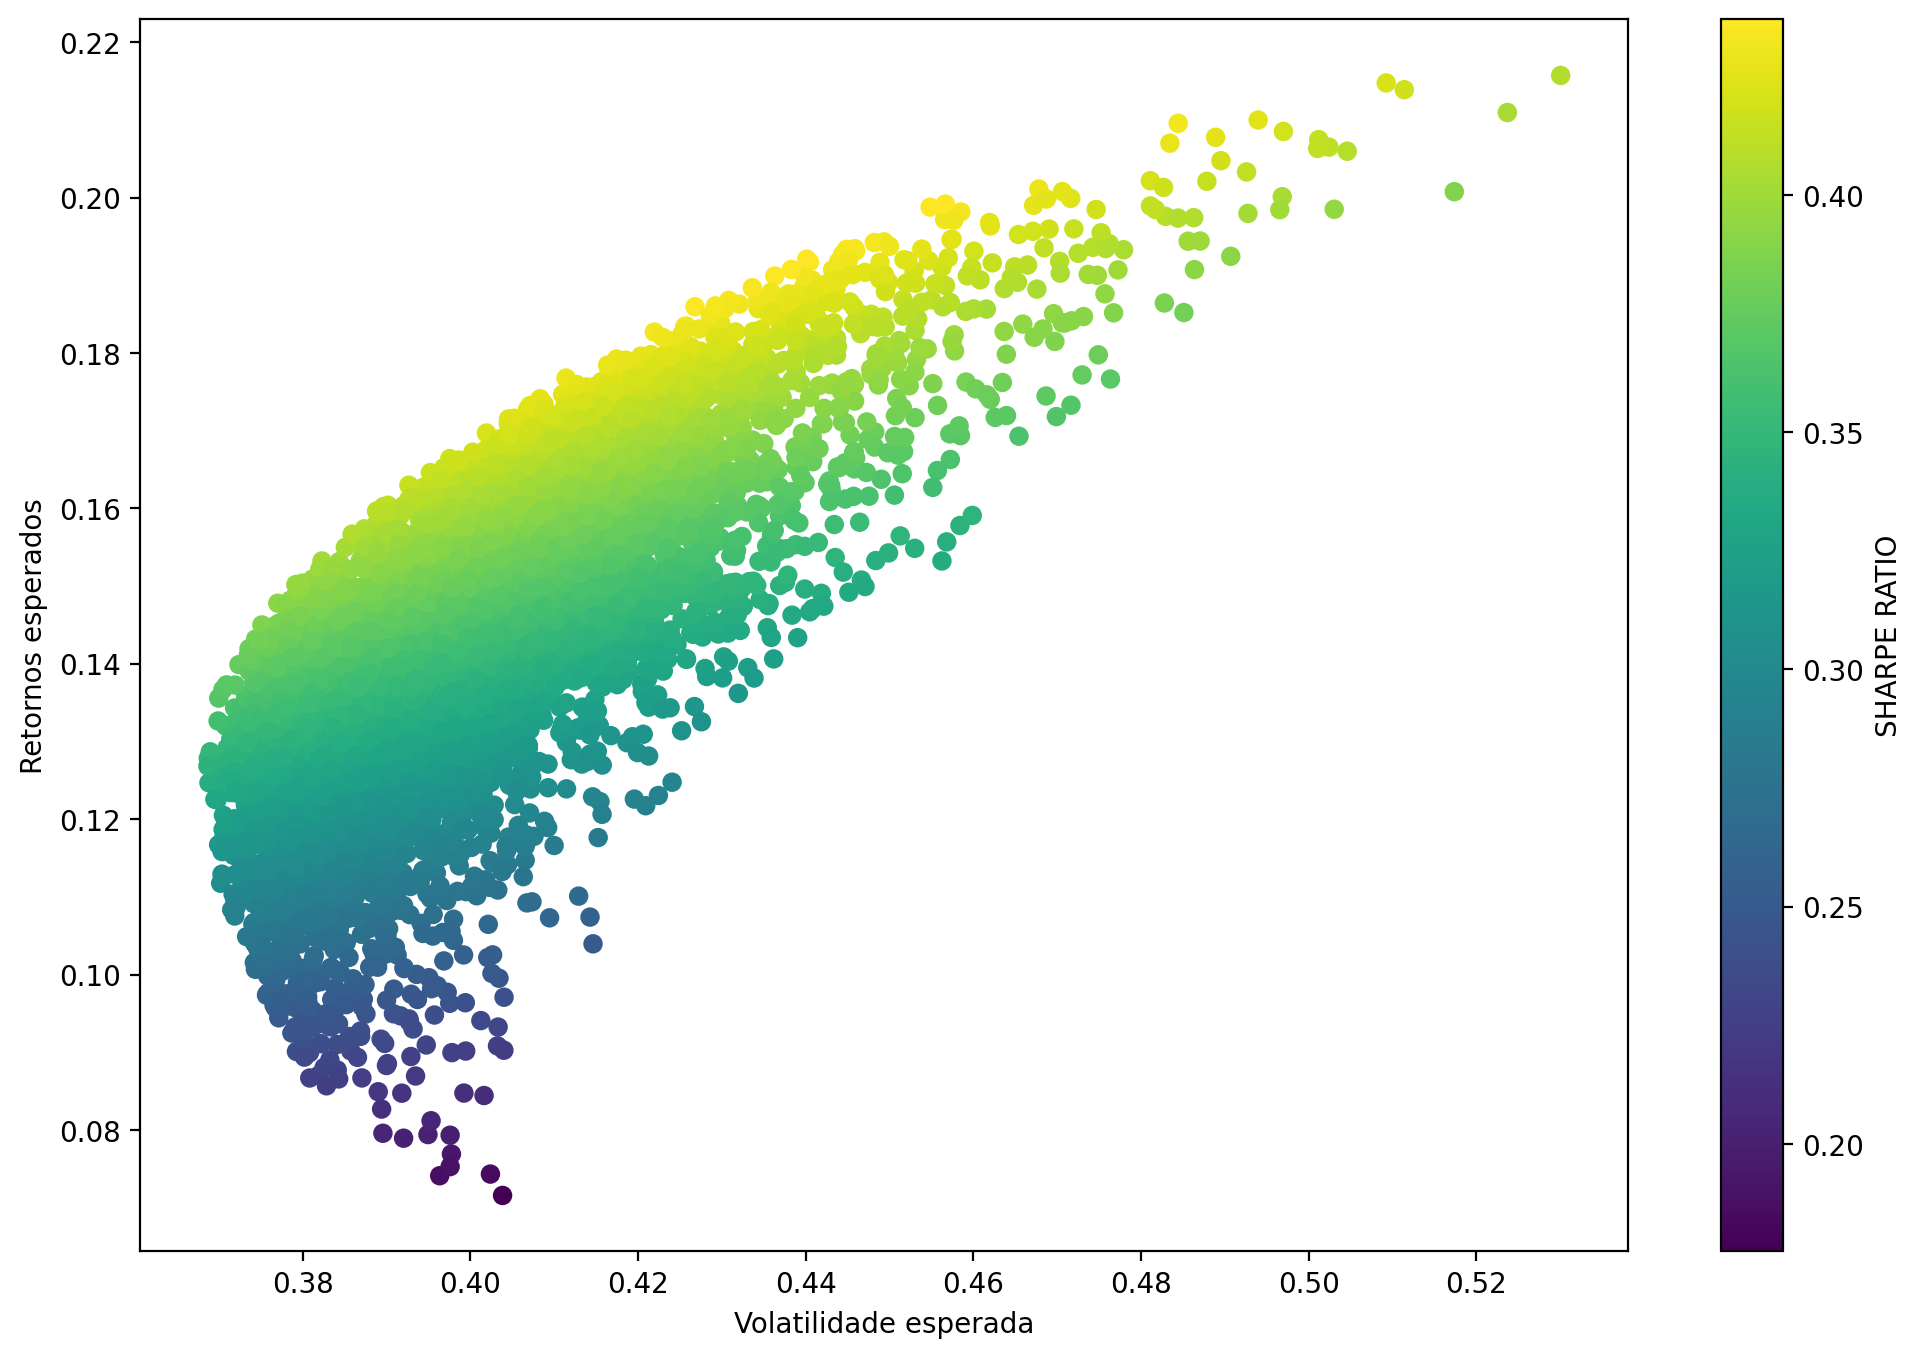

In [239]:
# Explorando o espaço de possíveis indicações de ativos e avaliar portfólios em termos de risco-retorno.
plt.figure(dpi=200,figsize=(12,8))
plt.scatter(mc_portfolio_vol,mc_portfolio_returns,c=mc_sharpe_ratios)
plt.ylabel('Retornos esperados')
plt.xlabel('Volatilidade esperada')
plt.colorbar(label="SHARPE RATIO");

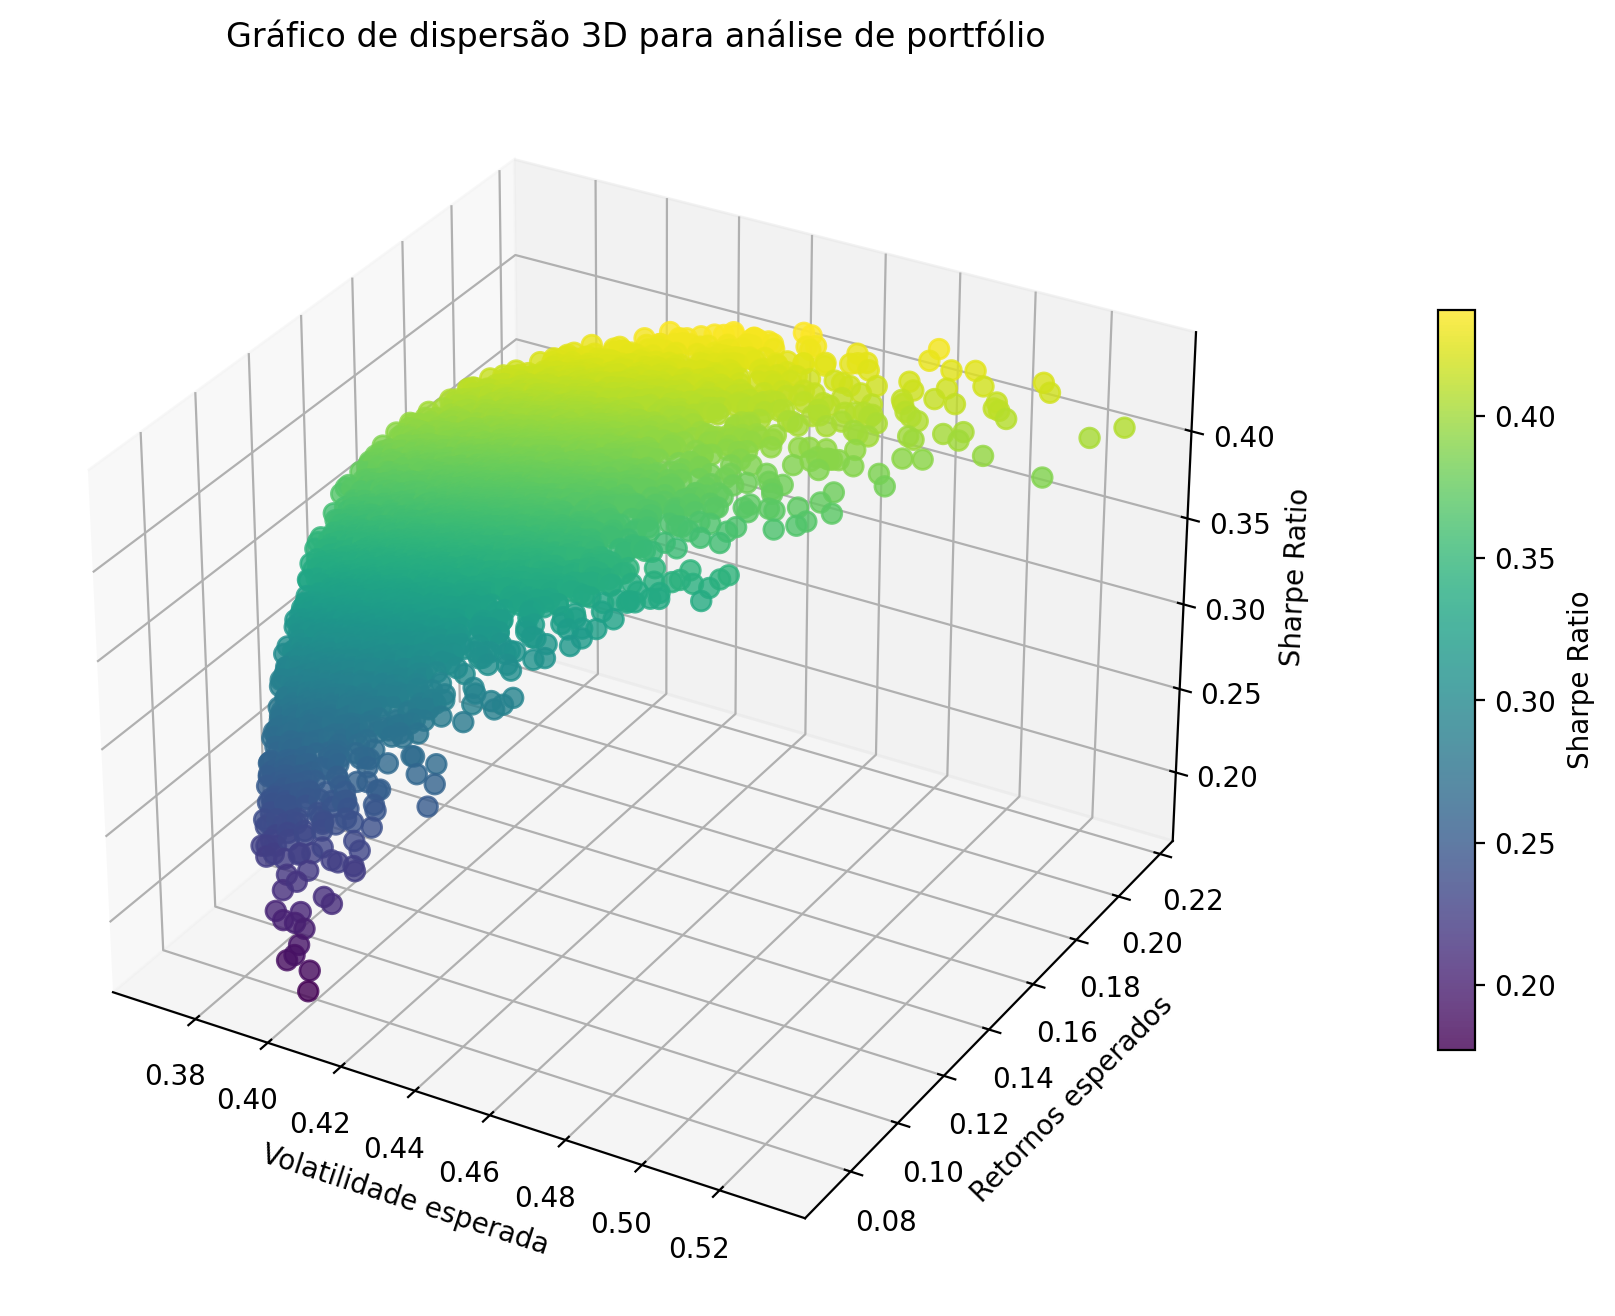

In [238]:
# Gráfico 3D
fig = plt.figure(dpi=200, figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter 3D
sc = ax.scatter(mc_portfolio_vol,  # Eixo X: Volatilidade
                mc_portfolio_returns,  # Eixo Y: Retorno
                mc_sharpe_ratios,  # Eixo Z: Sharpe Ratio
                c=mc_sharpe_ratios,  # Cor dos pontos com base no Sharpe Ratio
                cmap='viridis',  # Mapa de cores
                s=50,  # Tamanho dos pontos
                alpha=0.8)  # Transparência

# Personalização do gráfico
ax.set_xlabel('Volatilidade esperada')
ax.set_ylabel('Retornos esperados')
ax.set_zlabel('Sharpe Ratio')
ax.set_title('Gráfico de dispersão 3D para análise de portfólio')

# Barra de cores
cbar = plt.colorbar(sc, ax=ax, shrink=0.6, pad=0.1)
cbar.set_label('Sharpe Ratio')

plt.show()

In [182]:
# Pesos do portfólio associados ao maior valor do Sharpe Ratio 
mc_weights[np.argmax(mc_sharpe_ratios)]

array([0.46932591, 0.49704733, 0.0073825 , 0.02624426])

# Ponderação indicada por meio de pesquisa de minimização

Usando o Sharpe Ratio como nosso guia, podemos encontrar os pesos que otimizam o Sharpe Ratio usando a ferramenta de função de minimização do Scipy!

In [181]:
from scipy.optimize import minimize

In [183]:
def function_to_minimize(weights):
    # Nota -1* porque precisamos minimizar isso
    # É o mesmo que maximizar a taxa de nitidez positiva
    return -1 * (calculate_returns(weights,log_rets)/calculate_volatility(weights,log_rets_cov))

In [184]:
bounds = tuple((0,1) for n in range(N))

In [185]:
# Limite para cada ponderação (nós só operamos comprados)
bounds

((0, 1), (0, 1), (0, 1), (0, 1))

In [186]:
# Escolha inicial
equal_weights

[0.25, 0.25, 0.25, 0.25]

In [187]:
# É necessário restringir todos os pesos para somar 1
sum_constraint = ({'type': 'eq', 'fun': lambda weights: np.sum(weights)-1})

In [188]:
minimize(fun=function_to_minimize,x0=equal_weights,bounds=bounds,constraints=sum_constraint)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.43972334170795213
       x: [ 5.560e-01  4.440e-01  0.000e+00  0.000e+00]
     nit: 8
     jac: [ 2.234e-05 -2.797e-05  1.810e-01  2.446e-02]
    nfev: 40
    njev: 8

In [241]:
np.sum(np.array([0.58456807, 0., 0.17679024, 0.2386417 ]))

1.00000001

In [191]:
oilandmineral.columns

Index(['EQNR', 'PBR', 'SHELL', 'TTE'], dtype='object')

<Axes: xlabel='Date'>

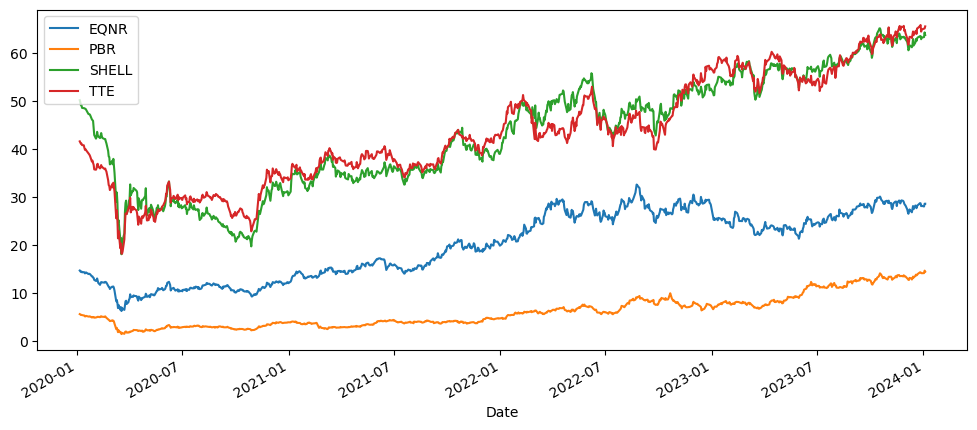

In [195]:
oilandmineral.plot(figsize=(12,5))

## Fronteira Eficiente

Fronteira eficiente é o conjunto de carteiras ótimas que oferece o maior retorno esperado para um nível de risco definido ou o menor risco para um determinado nível de retorno esperado.

As carteiras que se situam abaixo da fronteira eficiente são subótimas, porque não proporcionam retorno suficiente para o nível de risco. 

As carteiras que se agrupam à direita da fronteira eficiente também são subótimas, porque apresentam um nível de risco mais elevado para a taxa de retorno definida.


In [251]:
# Explorando uma faixa de retornos esperados para utilizar na simulação
expected_returns_range = np.linspace(0.06,0.23,100)

In [252]:
constraints = ({'type':'eq','fun': lambda weights: np.sum(weights)-1},
               {'type':'eq','fun': lambda weights: calculate_returns(weights,log_rets) - possible_return})

In [253]:
# Definindo a função que calcula a volatilidade anualizada de um portfólio, dada uma série de retornos logaritmos, usando os pesos dos ativos no portfólio
def calculate_volatility(weights):
    annualized_cov = np.dot(log_rets_cov*252,weights)
    vol = np.dot(weights.transpose(),annualized_cov)
    return np.sqrt(vol)

Loop para diferentes retornos esperados:

In [254]:
frontier_volatility = []

for possible_return in expected_returns_range:
    # Função de retorno   
    
    result = minimize(calculate_volatility,equal_weights,bounds=bounds,constraints=constraints)
    
    frontier_volatility.append(result['fun'])

### Fronteira do enredo

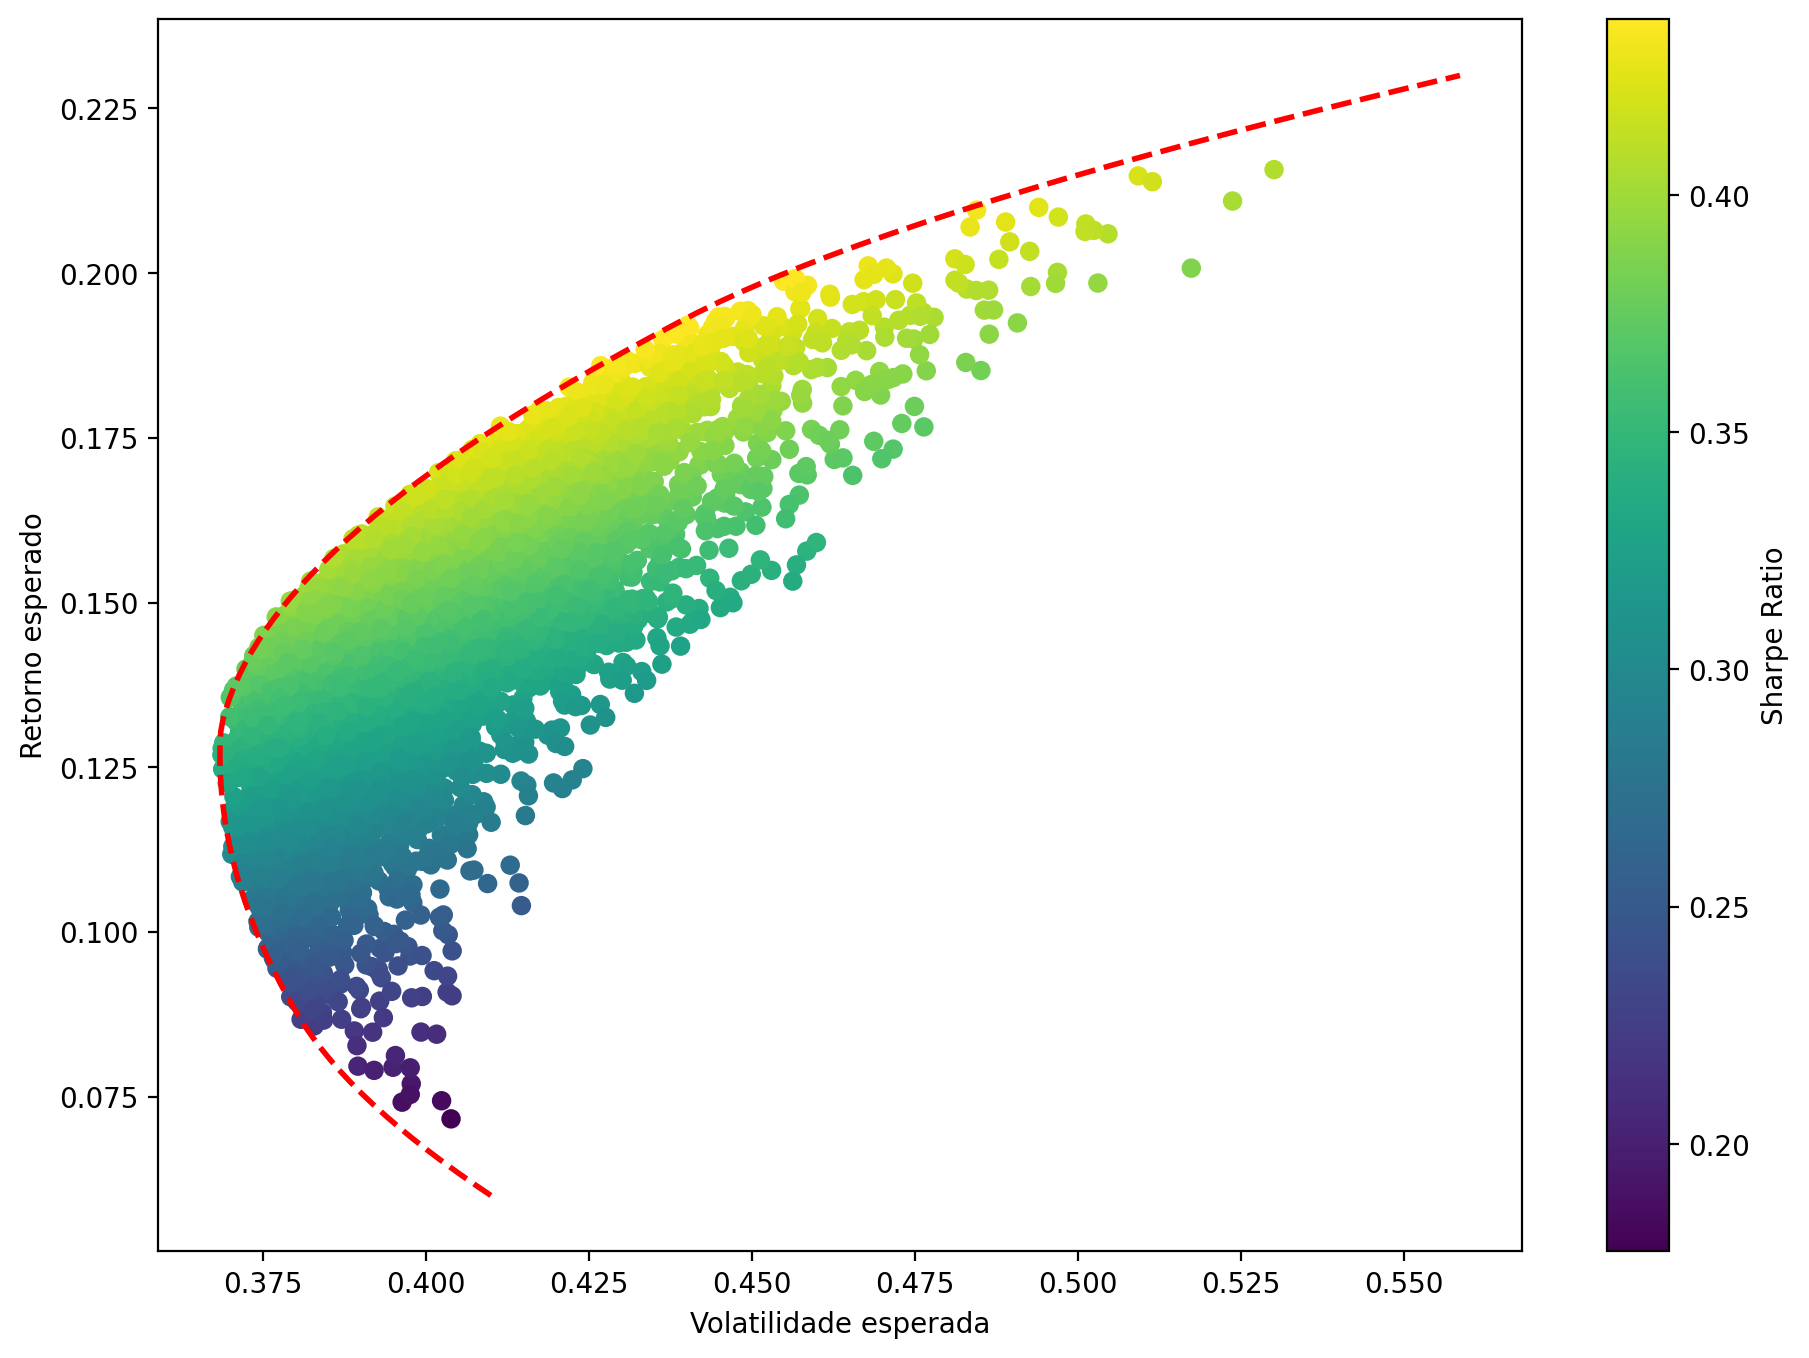

In [255]:
plt.figure(dpi=200,figsize=(11,8))
plt.scatter(mc_portfolio_vol,mc_portfolio_returns,c=mc_sharpe_ratios)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatilidade esperada')
plt.ylabel('Retorno esperado')
# Linha de fronteira
plt.plot(frontier_volatility,expected_returns_range,'r--',linewidth=2)

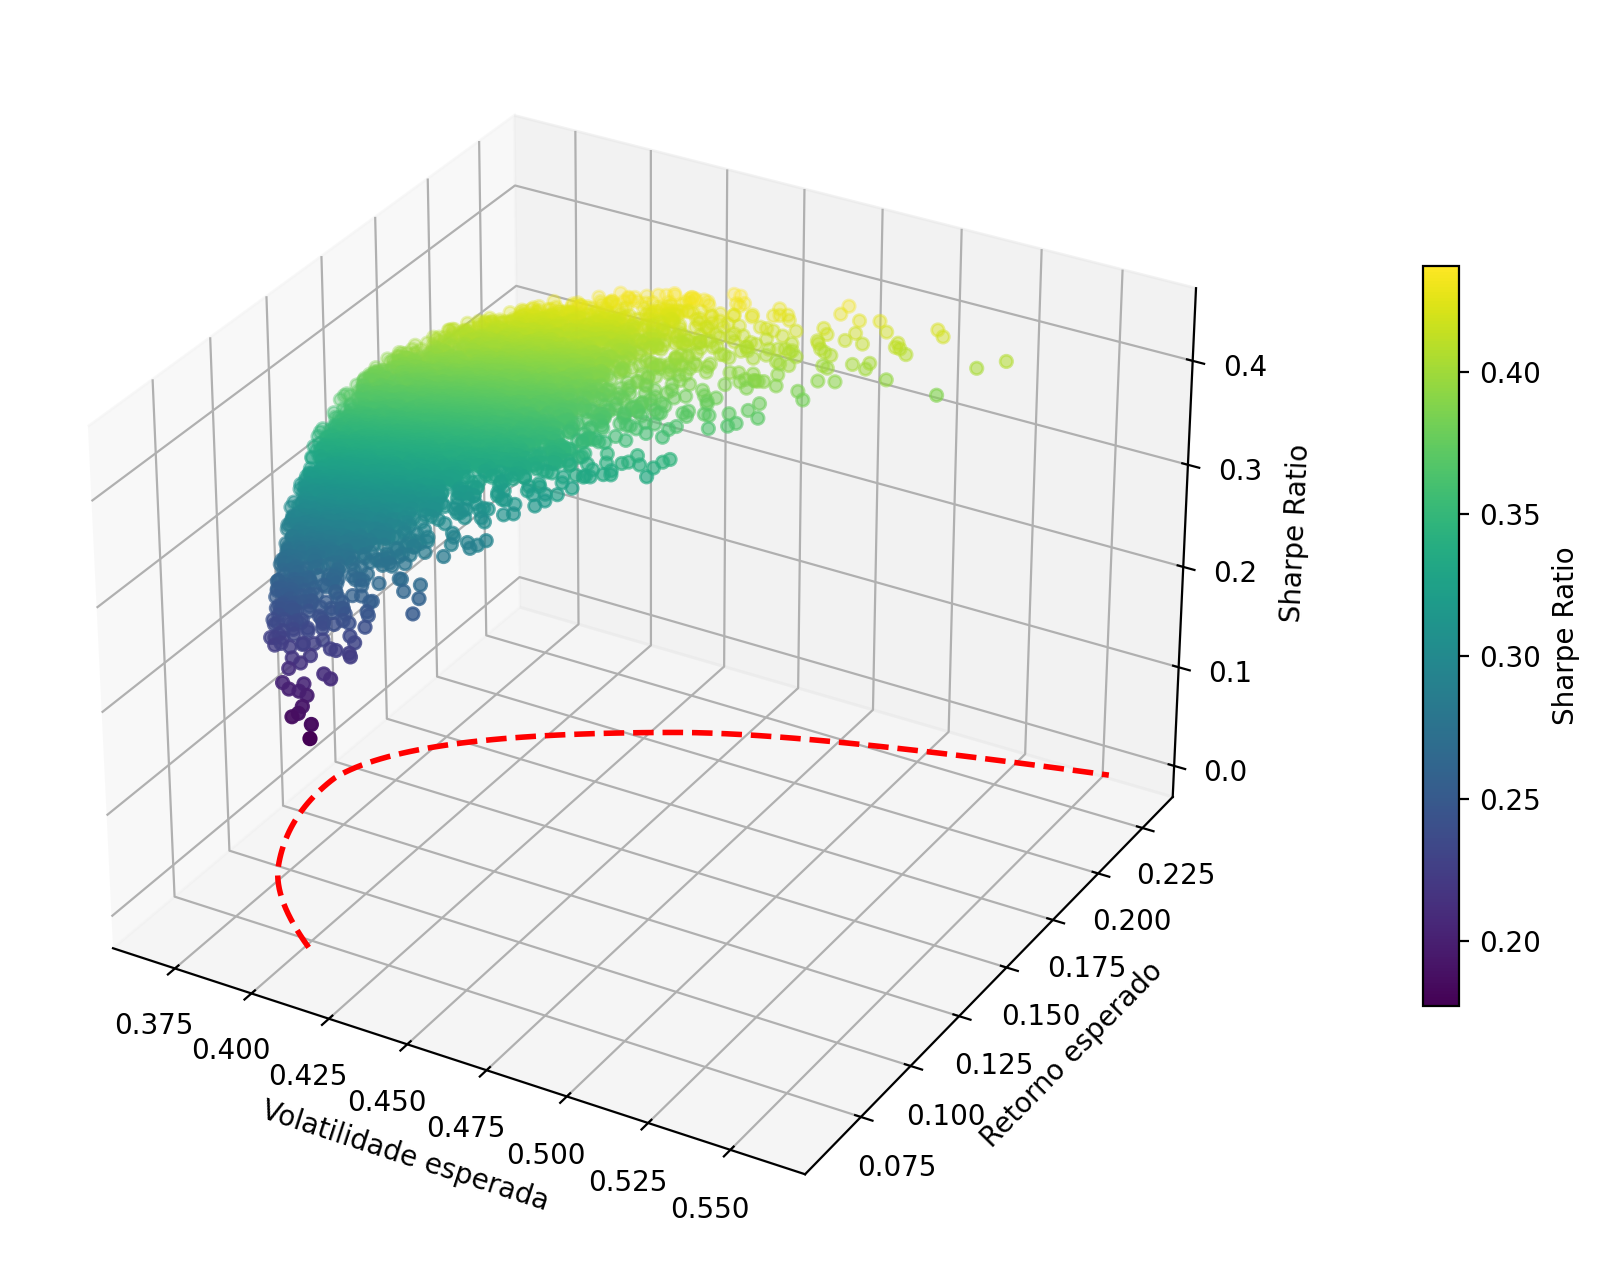

In [263]:
# Gráfico 3D
fig = plt.figure(dpi=200, figsize=(11, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotando os pontos no gráfico 3D
sc = ax.scatter(mc_portfolio_vol, mc_portfolio_returns, mc_sharpe_ratios, c=mc_sharpe_ratios, cmap='viridis')

# Adicionando a barra de cores
cbar = plt.colorbar(sc, ax=ax, shrink=0.6, pad=0.1)
cbar.set_label('Sharpe Ratio')

# Rotulando os eixos
ax.set_xlabel('Volatilidade esperada')
ax.set_ylabel('Retorno esperado')
ax.set_zlabel('Sharpe Ratio')

# Plotando a linha de fronteira
# frontier_volatility e expected_returns_range devem ter o mesmo tamanho
ax.plot(frontier_volatility, expected_returns_range, np.zeros_like(frontier_volatility), 'r--', linewidth=2)

# Exibindo o gráfico
plt.show()